In [1]:
import zipfile

In [2]:
local_zip = '../data/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

In [6]:
base_dir = 'cats_and_dogs_filtered'

print('Content of base directory:')
print(os.listdir(base_dir))

print('\nContent of train directory:')
print(os.listdir(f'{base_dir}/train'))

print('\nContent of validation directory:')
print(os.listdir(f'{base_dir}/validation'))

Content of base directory:
['train', 'validation', 'vectorize.py']

Content of train directory:
['cats', 'dogs']

Content of validation directory:
['cats', 'dogs']


In [9]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [18]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [19]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [20]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

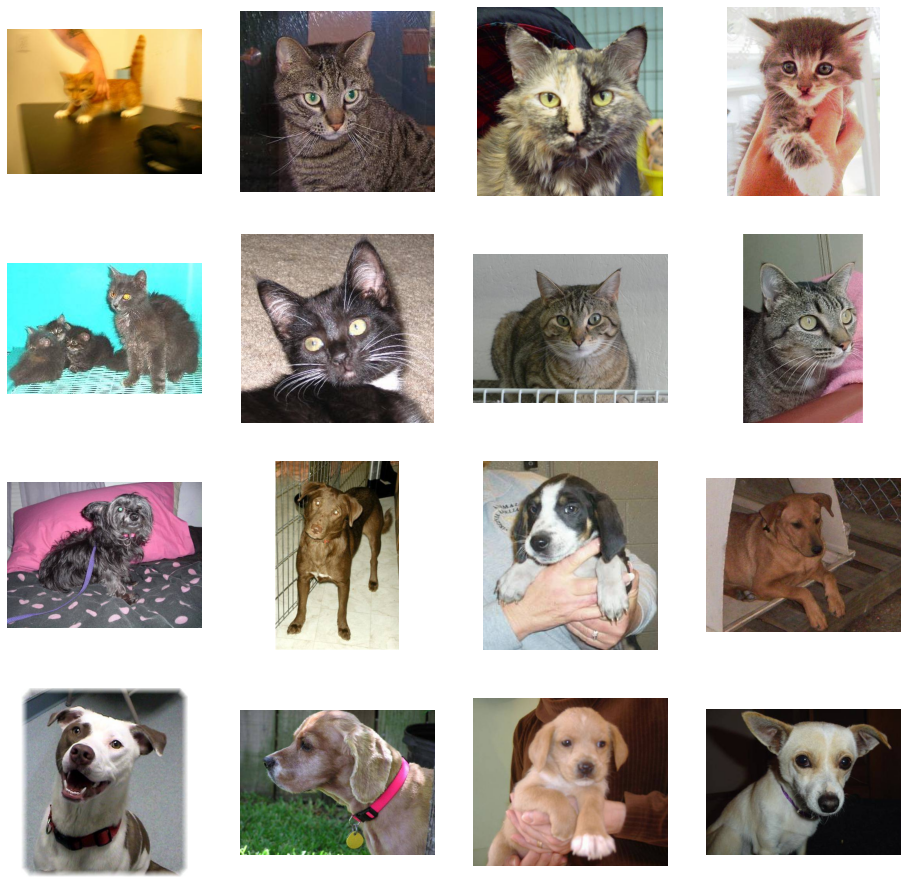

In [21]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [22]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [24]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
train_datagen = ImageDataGenerator(rescale = 1.0 / 255)
test_datagen = ImageDataGenerator(rescale = 1.0 / 255)

train_generator = train_datagen.flow_from_directory(
                                train_dir,
                                batch_size = 20,
                                class_mode = 'binary',
                                target_size = (150, 150)
)

validation_generator = test_datagen.flow_from_directory(
                                validation_dir,
                                batch_size = 20,
                                class_mode = 'binary',
                                target_size = (150, 150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
history = model.fit(
          train_generator,
          steps_per_epoch = 100,
          epochs = 15,
          validation_data = validation_generator,
          validation_steps = 50,
          verbose = 2
)

Epoch 1/15
100/100 - 39s - loss: 0.8355 - accuracy: 0.5630 - val_loss: 0.6743 - val_accuracy: 0.5440 - 39s/epoch - 393ms/step
Epoch 2/15
100/100 - 40s - loss: 0.6617 - accuracy: 0.6235 - val_loss: 0.6553 - val_accuracy: 0.6260 - 40s/epoch - 395ms/step
Epoch 3/15
100/100 - 36s - loss: 0.6074 - accuracy: 0.6935 - val_loss: 0.6153 - val_accuracy: 0.6910 - 36s/epoch - 358ms/step
Epoch 4/15
100/100 - 37s - loss: 0.5047 - accuracy: 0.7635 - val_loss: 0.6234 - val_accuracy: 0.6840 - 37s/epoch - 365ms/step
Epoch 5/15
100/100 - 37s - loss: 0.4146 - accuracy: 0.8055 - val_loss: 0.6313 - val_accuracy: 0.6840 - 37s/epoch - 368ms/step
Epoch 6/15
100/100 - 36s - loss: 0.3307 - accuracy: 0.8640 - val_loss: 0.7005 - val_accuracy: 0.6970 - 36s/epoch - 357ms/step
Epoch 7/15
100/100 - 36s - loss: 0.2331 - accuracy: 0.9090 - val_loss: 1.1699 - val_accuracy: 0.6810 - 36s/epoch - 356ms/step
Epoch 8/15
100/100 - 36s - loss: 0.1729 - accuracy: 0.9235 - val_loss: 1.0109 - val_accuracy: 0.7040 - 36s/epoch - 362

In [33]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np


from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
    # predicting images
    path='/content/' + fn
    img=image.load_img(path, target_size=(150, 150))
  
    x=image.img_to_array(img)
    x /= 255
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
  
    classes = model.predict(images, batch_size=10)
  
    print(classes[0])
  
    if classes[0]>0.5:
        print(fn + " is a dog")
    else:
        print(fn + " is a cat")

ModuleNotFoundError: No module named 'google.colab'